In [1]:
import sys, os, glob, warnings, logging
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sw_plotting import change_bar_width
from sw_utilities import tukeyTest

# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)
logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)

# ignore warnings
warnings.filterwarnings('ignore')

# plotting configuration
font = {'family' : 'Arial',
        'size'   : 7}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'

# Make a folder if it is not already there to store exported figures
!mkdir ../jupyter_figures

mkdir: ../jupyter_figures: File exists


In [13]:
def get_Ecad_intensity_series(df):
    Ecad_intensity = []
    for i in range(len(df)-1):
        temp = (df.Area[i]*df.Mean[i] - df.Area[i+1]*df.Mean[i+1]) / (df.Area[i] - df.Area[i+1])
        Ecad_intensity.append(temp)
    return Ecad_intensity

(90.0, 400.0)

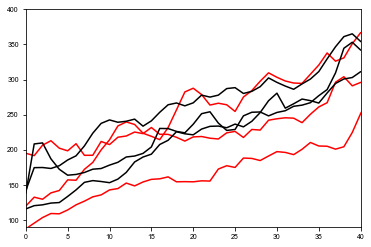

In [37]:
# read in data

df = pd.read_csv('../data/SMG-Ecad-shrinking-ROI/control-190713-SMG-collagenase-0ug-per-mL-1-Ecad-in-shrinking-ROIs.csv')
Ecad_intensity = get_Ecad_intensity_series(df)
plt.plot(Ecad_intensity, 'r')
df = pd.read_csv('../data/SMG-Ecad-shrinking-ROI/control-190713-SMG-collagenase-0ug-per-mL-2-Ecad-in-shrinking-ROIs.csv')
Ecad_intensity = get_Ecad_intensity_series(df)
plt.plot(Ecad_intensity, 'r')
df = pd.read_csv('../data/SMG-Ecad-shrinking-ROI/control-190713-SMG-collagenase-0ug-per-mL-3-Ecad-in-shrinking-ROIs.csv')
Ecad_intensity = get_Ecad_intensity_series(df)
plt.plot(Ecad_intensity, 'r')

df = pd.read_csv('../data/SMG-Ecad-shrinking-ROI/collagenase-190713-SMG-collagenase-2ug-per-mL-1-Ecad-in-shrinking-ROIs.csv')
Ecad_intensity = get_Ecad_intensity_series(df)
plt.plot(Ecad_intensity, 'k')
df = pd.read_csv('../data/SMG-Ecad-shrinking-ROI/collagenase-190713-SMG-collagenase-2ug-per-mL-2-Ecad-in-shrinking-ROIs.csv')
Ecad_intensity = get_Ecad_intensity_series(df)
plt.plot(Ecad_intensity, 'k')
df = pd.read_csv('../data/SMG-Ecad-shrinking-ROI/collagenase-190713-SMG-collagenase-2ug-per-mL-3-Ecad-in-shrinking-ROIs.csv')
Ecad_intensity = get_Ecad_intensity_series(df)
plt.plot(Ecad_intensity, 'k')

plt.xlim(0, 40)
plt.ylim(90, 400)

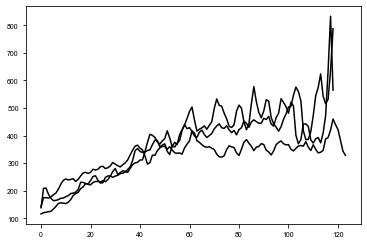

In [33]:

df = pd.read_csv('../data/SMG-Ecad-shrinking-ROI/collagenase-190713-SMG-collagenase-2ug-per-mL-1-Ecad-in-shrinking-ROIs.csv')
Ecad_intensity = get_Ecad_intensity_series(df)
plt.plot(Ecad_intensity, 'k')
df = pd.read_csv('../data/SMG-Ecad-shrinking-ROI/collagenase-190713-SMG-collagenase-2ug-per-mL-2-Ecad-in-shrinking-ROIs.csv')
Ecad_intensity = get_Ecad_intensity_series(df)
plt.plot(Ecad_intensity, 'k')
df = pd.read_csv('../data/SMG-Ecad-shrinking-ROI/collagenase-190713-SMG-collagenase-2ug-per-mL-3-Ecad-in-shrinking-ROIs.csv')
Ecad_intensity = get_Ecad_intensity_series(df)
plt.plot(Ecad_intensity, 'k')


In [4]:
tukeyTest(df.on_surface_ratio, df.group_id)

Summary of test:
             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
       group1             group2       meandiff p-adj   lower  upper  reject
----------------------------------------------------------------------------
collagenase_nascent collagenase_random   0.0658  0.812 -0.1398 0.2714  False
collagenase_nascent    control_nascent   0.2679 0.0138  0.0419 0.4939   True
collagenase_nascent     control_random   0.2914 0.0042  0.0737 0.5092   True
 collagenase_random    control_nascent   0.2021 0.0904 -0.0215 0.4257  False
 collagenase_random     control_random   0.2256 0.0364  0.0104 0.4409   True
    control_nascent     control_random   0.0235    0.9 -0.2113 0.2584  False
----------------------------------------------------------------------------
p values of all pair-wise tests:
 [0.81198905 0.01378688 0.00419302 0.09040597 0.03636749 0.9       ]


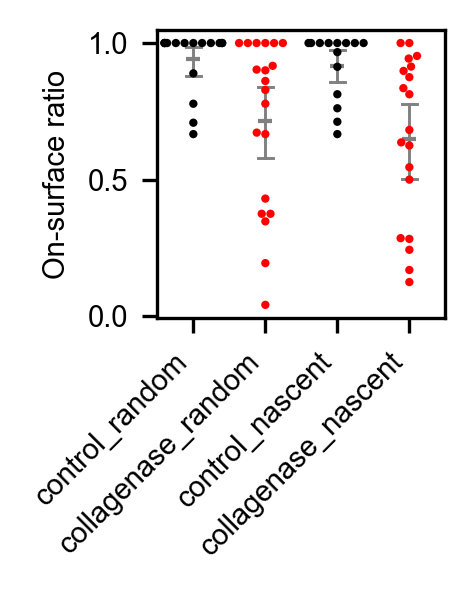

In [5]:
# Make swarm plot with error bars for the raw counts
datasetPrefix = 'SMG-collagenase-surface-residence'
outputFigPath = '../jupyter_figures/' + datasetPrefix + '.svg'

fig_width, fig_height = 1.2, 1.2
fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

xCol, yCol = 'group_id', 'on_surface_ratio'
# ax.set_ylim([0, 1])

plottingOrder = ['control_random', 'collagenase_random',
                 'control_nascent', 'collagenase_nascent']

# Customize color of each group
paletteDict = {'control': 'black', 'collagenase': 'red'}

ax = sns.swarmplot(x=xCol, y=yCol, data=df,
#                    order=plottingOrder,
                   hue='experiment_group', palette=paletteDict,
#                    color='Gray',
                   size=2.0)
ax = sns.pointplot(x=xCol, y=yCol, data=df,
                   order=plottingOrder,
                   ci=95, capsize=.2, errwidth=.7,
#                    hue='experiment_group', palette=paletteDict,
                   color='Gray',
                   markers='_', scale=.5, join=False)

plt.xlabel("")
plt.ylabel("On-surface ratio")
# plt.ylabel("Young's modulus (Pa)")

# rotate x tick labels if necessary
x_labels = ax.get_xticklabels()
ax.set_xticklabels(labels=x_labels, rotation=45, ha="right")

# remove legend
ax.get_legend().remove()

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

plt.savefig(outputFigPath)


In [6]:
df.groupby('group_id').describe()

on_surface_ratio                                          \
                               count      mean       std       min       25%   
group_id                                                                       
collagenase_nascent             19.0  0.648672  0.301813  0.125000  0.392857   
collagenase_random              20.0  0.714457  0.308774  0.041667  0.416667   
control_nascent                 14.0  0.916567  0.123268  0.666667  0.837636   
control_random                  16.0  0.940104  0.115617  0.666667  0.972222   

                                             track_duration             \
                          50%       75%  max          count       mean   
group_id                                                                 
collagenase_nascent  0.681818  0.905876  1.0           19.0  64.894737   
collagenase_random   0.844618  1.000000  1.0           20.0  58.750000   
control_nascent      1.000000  1.000000  1.0           14.0  57.500000   
control_random       1.000000  1.000000  1.0           16.0  72.000000   

                                                                
                           std   min    25%   50%   75%    max  
group_id                                                        
collagenase_nascent  36.675597  14.0  48.00  50.0  73.5  150.0  
collagenase_random   20.232530  19.0  51.25  72.0  72.0   72.0  
control_nascent      11.804497  44.0  50.25  53.0  60.5   90.0  
control_random        0.000000  72.0  72.00  72.0  72.0   72.0

In [7]:
# weighted average of each group
for group in df.group_id.unique():
    temp = df[df.group_id==group]
    temp.reset_index(drop=True, inplace=True)
    tempList = [temp.track_duration[i]*temp.on_surface_ratio[i]
                for i in range(len(temp))]
    temp['n_frames_on_surface'] = tempList
    average_on_surface_ratio = np.sum(temp.n_frames_on_surface)/np.sum(temp.track_duration)
    print('The weighted average of ', group, 'is', average_on_surface_ratio)

The weighted average of  control_random is 0.9401041666875
The weighted average of  collagenase_random is 0.6587234043472341
The weighted average of  control_nascent is 0.9155279503751553
The weighted average of  collagenase_nascent is 0.7404703974128142


In [8]:
# weighted average of each experimental group
for group in df.experiment_group.unique():
    temp = df[df.experiment_group==group]
    temp.reset_index(drop=True, inplace=True)
    tempList = [temp.track_duration[i]*temp.on_surface_ratio[i]
                for i in range(len(temp))]
    temp['n_frames_on_surface'] = tempList
    average_on_surface_ratio = np.sum(temp.n_frames_on_surface)/np.sum(temp.track_duration)
    print('The weighted average of ', group, 'is', average_on_surface_ratio)

The weighted average of  control is 0.9299948901768013
The weighted average of  collagenase is 0.7005813953978406
